# 고객 그룹 나누기 
k-means 클러스터링 알고리즘을 사용해 고객 데이터를 가지고 분할하는 과제를 해보겠다.
1. 라이브러리 임포트
2. 데이터 불러와서 시각화하고 분석하기
3. k-means 알고리즘으로 클러스터링하고 클러스터 선택하기
4. boundary 긋기
5. 3D 그려보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv("../data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/Users/leeheejin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leeheejin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leeheejin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

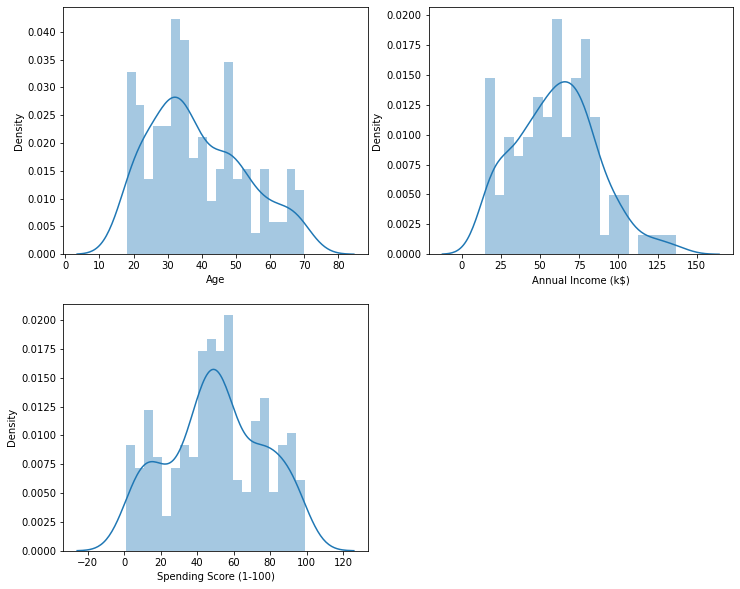

In [5]:
fig = plt.figure(figsize = (12,10))
n = 0
for x in df.columns.tolist()[2:]:
    n += 1
    ax = fig.add_subplot(2,2,n)
    ax = sns.distplot(df[x], bins=20)
plt.show()

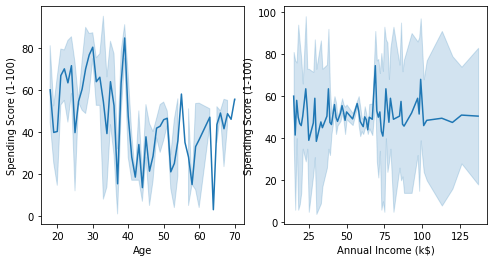

In [12]:
fig = plt.figure(figsize = (8,4))
n = 0
for x in df.columns.tolist()[2:4]:
    n += 1
    ax = fig.add_subplot(1,2,n)
    ax = sns.lineplot(x=df[x], y=df['Spending Score (1-100)'])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

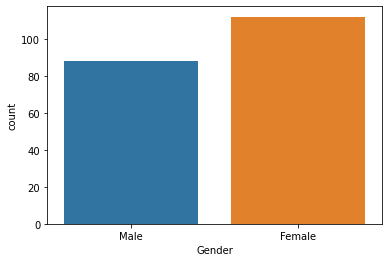

In [15]:
sns.countplot(x=df['Gender'], data=df)

- 데이터 스케일링 하기 전과 후 비교하기
- 데이터 ['Gender', 'Age',	'Annual Income (k$','Spending Score (1-100)'] 중에 두개씩 골라서 해보고, 세개씩 골라서 해보기

In [17]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

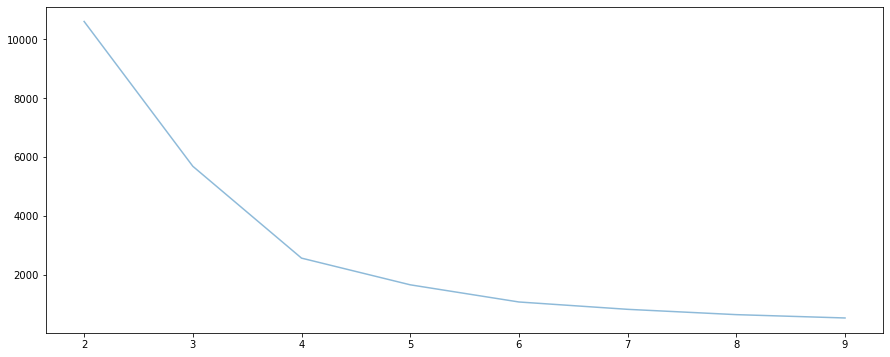

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

use_df1 = df[['Gender', 'Age']]
use_df2 = df[['Annual Income (k$)','Spending Score (1-100)']]
use_df3 = df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]

inertias = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(use_df1)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(15,6))
sns.lineplot(x = range(2,10), y=inertias, markers='o', alpha=0.5)

plt.show()

In [33]:
model1 = KMeans(n_clusters=4, max_iter=300, random_state=111)
model1.fit(df[['Gender', 'Age']])
labels1 = model1.labels_
df['labels1'] = labels1
centroids1 = model1.cluster_centers_

model2 = KMeans(n_clusters=5, max_iter=300, random_state=111)
model2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
labels2 = model2.labels_
df['labels2'] = labels2
centroids2 = model2.cluster_centers_

model3 = KMeans(n_clusters=6, max_iter=300, random_state=111)
model3.fit(df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])
labels3 = model3.labels_
df['labels3'] = labels3
centroids3 = model3.cluster_centers_

In [34]:
# 1. 성별과 나이 클러스터링 결과
# 2. 수입과 소비 랭킹 클러스터링 결과
# 3. 네개 지표 pca 한 후 클러스터링 결과
# 4. 데이터 정규화 후 3번 반복한 결과

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1004)
pca_result = pca.fit_transform(df)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

model4 = KMeans(n_clusters=6, max_iter=300, random_state=111)
model4.fit(df[['pca1', 'pca2']])
labels4 = model4.labels_
df['labels4'] = labels4
centroids4 = model4.cluster_centers_

In [42]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels1,labels2,labels3,pca1,pca2
0,1,0,19,15,39,0,4,4,-109.417768,5.546843
1,2,0,21,15,81,0,2,3,-108.210125,-34.920961
2,3,1,20,16,6,0,4,4,-107.412938,37.891726
3,4,1,23,16,77,0,2,3,-106.015512,-30.554438
4,5,1,31,17,40,3,4,4,-104.999113,7.347607
...,...,...,...,...,...,...,...,...,...,...
195,196,1,35,120,79,3,0,1,111.675357,-27.974396
196,197,1,45,126,28,1,3,2,114.594103,24.098146
197,198,0,32,126,74,3,0,1,115.933436,-23.738765
198,199,0,32,137,18,3,3,2,120.926863,30.937703


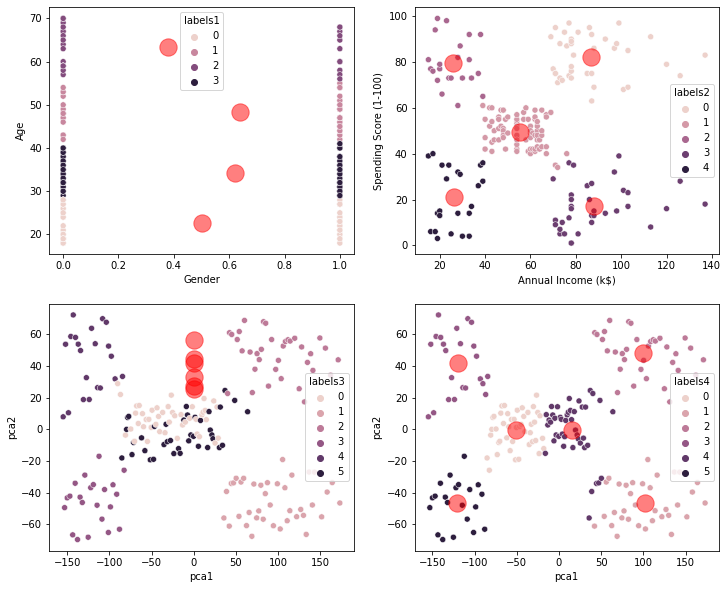

In [48]:

fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.scatterplot(x='Gender', y='Age', data=df[['Gender', 'Age', 'labels1']], hue='labels1')
ax1 = plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df[['Annual Income (k$)','Spending Score (1-100)','labels2']], hue='labels2')
ax2 = plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.scatterplot(x='pca1', y='pca2', data=df[['pca1', 'pca2', 'labels3']], hue='labels3')
ax3 = plt.scatter(x = centroids3[:, 0], y = centroids3[:, 1], s = 300, c = 'red', alpha = 0.5)

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.scatterplot(x='pca1', y='pca2', data=df[['pca1', 'pca2', 'labels4']], hue='labels4')
ax4 = plt.scatter(x = centroids4[:, 0], y = centroids4[:, 1], s = 300, c = 'red', alpha = 0.5)


In [52]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

df = pd.read_csv('../data/Mall_Customers.csv')
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

scaler = MinMaxScaler()
features = df.columns.tolist()[1:]
df[features] = scaler.fit_transform(df[features])

pca = PCA(random_state=1004)
pca_result = pca.fit_transform(df[features])
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),pca1,pca2
0,1,0.0,0.019231,0.000000,0.387755,0.532955,-0.227841
1,2,0.0,0.057692,0.000000,0.816327,0.513939,-0.493080
2,3,1.0,0.038462,0.008197,0.051020,-0.446266,0.087079
3,4,1.0,0.096154,0.008197,0.775510,-0.478796,-0.366617
4,5,1.0,0.250000,0.016393,0.397959,-0.451984,0.003006
...,...,...,...,...,...,...,...
195,196,1.0,0.326923,0.860656,0.795918,-0.442610,-0.237388
196,197,1.0,0.519231,0.909836,0.275510,-0.405571,0.256687
197,198,0.0,0.269231,0.909836,0.744898,0.555315,-0.316617
198,199,0.0,0.269231,1.000000,0.173469,0.586009,0.071676


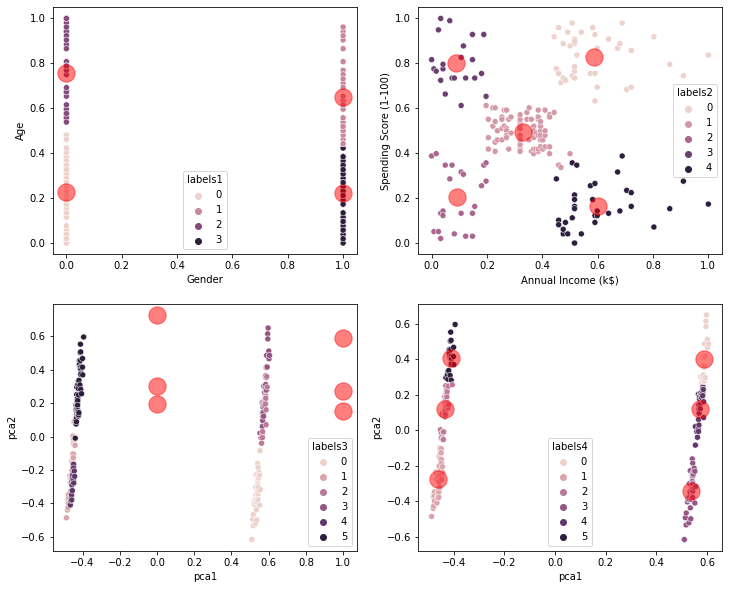

In [53]:
model1 = KMeans(n_clusters=4, max_iter=300, random_state=111)
model1.fit(df[['Gender', 'Age']])
labels1 = model1.labels_
df['labels1'] = labels1
centroids1 = model1.cluster_centers_

model2 = KMeans(n_clusters=5, max_iter=300, random_state=111)
model2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
labels2 = model2.labels_
df['labels2'] = labels2
centroids2 = model2.cluster_centers_

model3 = KMeans(n_clusters=6, max_iter=300, random_state=111)
model3.fit(df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])
labels3 = model3.labels_
df['labels3'] = labels3
centroids3 = model3.cluster_centers_

model4 = KMeans(n_clusters=6, max_iter=300, random_state=111)
model4.fit(df[['pca1', 'pca2']])
labels4 = model4.labels_
df['labels4'] = labels4
centroids4 = model4.cluster_centers_

fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.scatterplot(x='Gender', y='Age', data=df[['Gender', 'Age', 'labels1']], hue='labels1')
ax1 = plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df[['Annual Income (k$)','Spending Score (1-100)','labels2']], hue='labels2')
ax2 = plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.scatterplot(x='pca1', y='pca2', data=df[['pca1', 'pca2', 'labels3']], hue='labels3')
ax3 = plt.scatter(x = centroids3[:, 0], y = centroids3[:, 1], s = 300, c = 'red', alpha = 0.5)

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.scatterplot(x='pca1', y='pca2', data=df[['pca1', 'pca2', 'labels4']], hue='labels4')
ax4 = plt.scatter(x = centroids4[:, 0], y = centroids4[:, 1], s = 300, c = 'red', alpha = 0.5)
